In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


# Pandas

In [4]:
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_ref_sig_ext_naive_skim/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_ref_sig_ext/'

# base_filter =  'D0_M>1.83 && D0_M<1.90 '
# # base_filter += '&& Dstarp_isSignal==1'
# tree = 'ref_phi'

# variables=['D0_M','Dstarp_Q','Dstarp_CMS_p','__ncandidates__','Dstarp_isSignal']
# var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

base_filter =  'D0_M>1.83 && D0_M<1.90 '
base_filter += '&& Dstarp_isSignal!=1'
tree = 'ref_phi'

variables=["__experiment__", "__run__", "__event__",'D0_M','Dstarp_Q','Dstarp_CMS_p','__ncandidates__','Dstarp_isSignal','Dstarp_chiProb']
var = 'D0_M'

In [34]:
# ccbar_0 = base_file_loc + 'topo/resultfile/result_ref_phi/standard.root'
# ccbar_0 = base_file_loc + 'topo/generic_ccbar.root'

# ccbar_0 = base_file_loc + 'generic_ccbar.root'

# uubar_0 = base_file_loc + 'generic_uubar.root'
# ddbar_0 = base_file_loc + 'generic_ddbar.root'
# ssbar_0 = base_file_loc + 'generic_ssbar.root'
# charged_0 = base_file_loc + 'generic_charged.root'
# mixed_0 = base_file_loc + 'generic_mixed.root'
# taupair_0 = base_file_loc + 'generic_taupair.root'

ccbar_0 = base_file_loc + 'ccbar/recon_*.root'

uubar_0 = base_file_loc + 'uubar/recon_*.root'
ddbar_0 = base_file_loc + 'ddbar/recon_*.root'
ssbar_0 = base_file_loc + 'ssbar/recon_*.root'
charged_0 = base_file_loc + 'charged/recon_*.root'
mixed_0 = base_file_loc + 'mixed/recon_*.root'
taupair_0 = base_file_loc + 'taupair/recon_*.root'





In [35]:
base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar_0 = get_pd(file=ccbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_uubar_0 = get_pd(file=uubar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_ddbar_0 = get_pd(file=ddbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=ssbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_charged_0 = get_pd(file=charged_0, tree=tree,base_filter=base_filter,variables=variables)

pd_mixed_0 = get_pd(file=mixed_0, tree=tree,base_filter=base_filter,variables=variables)

pd_taupair_0 = get_pd(file=taupair_0, tree=tree,base_filter=base_filter,variables=variables)


In [36]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [37]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [38]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

9031
9048
0.9981211317418214


In [39]:
cut = 'D0_M>0.0'

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[171. 183. 152. 138. 166. 140. 154. 160. 135. 166. 161. 143. 123. 127.
 142. 138. 126. 132. 164. 172. 244. 312. 390. 511. 557. 480. 498. 329.
 267. 209. 172. 151. 125. 100. 111. 119. 117.  99. 113.  92. 104. 115.
  78. 109.  90. 114. 104. 120. 110. 115.]
fitst_bin_entries=171.0


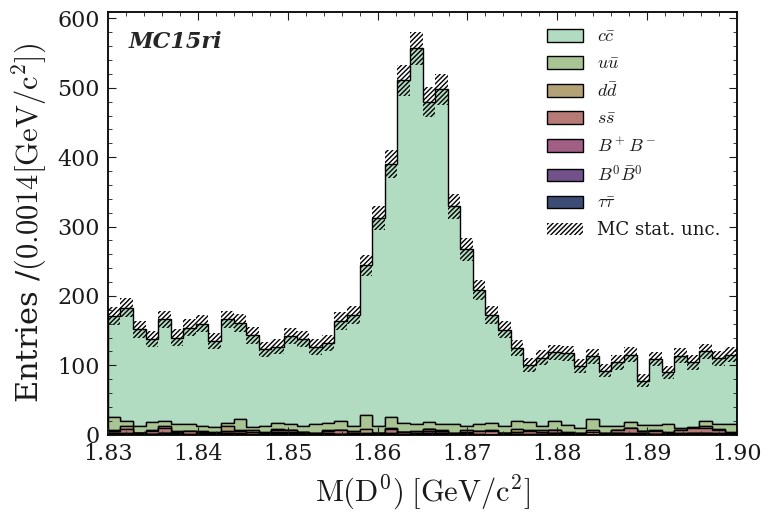

In [40]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.83,1.90)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1)
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/MC15ri_optv1_ref_phi_D0M.png")
plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/MC15ri_optv1_ref_phi_D0M_isSignal_not1.png")

In [21]:
pd_all_generic = pd.concat([pd_ccbar, pd_uubar, pd_ddbar, pd_ssbar, pd_charged, pd_mixed, pd_taupair], ignore_index=True)

pd_all_generic.describe()


,__experiment__,__run__,__event__,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal,Dstarp_chiProb,rank
count,174873.0,174873.0,1.748730e+05,174873.000000,174873.000000,174873.000000,174873.000000,172800.000000,174873.000000,174873.000000
mean,1003.0,0.0,1.325726e+08,1.864494,0.005868,3.453439,1.003334,0.959635,0.398209,1.001813
std,0.0,0.0,7.697876e+07,0.006447,0.000231,0.591255,0.057940,0.196813,0.299370,0.042672
min,1003.0,0.0,4.500000e+02,1.830002,0.005130,2.500001,1.000000,0.000000,0.001000,1.000000
25%,1003.0,0.0,6.585586e+07,1.861944,0.005746,2.958692,1.000000,1.000000,0.123513,1.000000
50%,1003.0,0.0,1.322976e+08,1.864666,0.005861,3.395586,1.000000,1.000000,0.352820,1.000000
75%,1003.0,0.0,1.993879e+08,1.867349,0.005979,3.900587,1.000000,1.000000,0.646232,1.000000
max,1003.0,0.0,3.209028e+08,1.899974,0.006730,5.083045,3.000000,1.000000,0.999968,3.000000


In [22]:
N_isSignal_1 = len(pd_all_generic.query('Dstarp_isSignal==1'))
print(N_isSignal_1)

165825


# Fit D0 + D0bar only in ccbar

In [31]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

# loc_ccbar = base_file_loc + 'ccbar/recon_*.root'
loc_ccbar = base_file_loc + 'topo/resultfile/result_ref_phi/standard.root'
# # loc_uubar = base_file_loc + 'uubar/recon_*.root'
# # loc_ddbar = base_file_loc + 'ddbar/recon_*.root'
# # loc_ssbar = base_file_loc + 'ssbar/recon_*.root'
# # loc_charged = base_file_loc + 'charged/recon_*.root'
# # loc_mixed = base_file_loc + 'mixed/recon_*.root'
# # loc_taupair = base_file_loc + 'taupair/recon_*.root'

In [32]:
# loc_ccbar_cc = base_file_loc + 'ccbar/recon_*.root/ref_phi_cc'
# # loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
# loc_uubar_cc  = base_file_loc + 'uubar/recon_*.root/ref_phi_cc'
# loc_ddbar_cc  = base_file_loc + 'ddbar/recon_*.root/ref_phi_cc'
# loc_ssbar_cc  = base_file_loc + 'ssbar/recon_*.root/ref_phi_cc'
# loc_charged_cc  = base_file_loc + 'charged/recon_*.root/ref_phi_cc'
# loc_mixed_cc  = base_file_loc + 'mixed/recon_*.root/ref_phi_cc'
# loc_taupair_cc  = base_file_loc + 'taupair/recon_*.root/ref_phi_cc'

In [33]:
# file_list = [loc_ccbar,loc_ccbar_cc]
file_list = [loc_ccbar]
mychain = ROOT.TChain("ref_phi")
# mychain = ROOT.TChain("ref_rho_cc")
 
for i in file_list:
    mychain.Add(i)

In [34]:
fitting_region = (1.84, 1.89)
# fitting_region = (1.85, 1.88)
# 
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("Dstarp_isSignal", "M(D^{0}) [GeV/c^{2}]", 0, 1, "")
z = ROOT.RooRealVar("nSigCascDcyBr_0", "", 0, 10, "")
# x.setBins(50)
# RooDataSet* data3 = new RooDataSet(“data3”,“data3”,sIeta,Import(*chain)) ;

# roodataset = ROOT.RooDataSet("roodataset","", x , ROOT.RooFit.Import(mychain), ROOT.RooFit.CutRange("D0_M>1.83 && D0_M<1.9"))
roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y, z) , ROOT.RooFit.Import(mychain), Cut="nSigCascDcyBr_0==1")
# roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain))



roodataset = roodataset_i.reduce("D0_M>1.84 && D0_M<1.89 ")
# roodataset = roodataset_i.reduce("D0_M>1.85 && D0_M<1.88 ")

roodataset.Print("v")

[#1] INFO:InputArguments -- The formula nSigCascDcyBr_0==1 claims to use the variables (D0_M,Dstarp_isSignal,nSigCascDcyBr_0) but only (nSigCascDcyBr_0) seem to be in use.
  inputs:         nSigCascDcyBr_0==1
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(nSigCascDcyBr_0) TTree Int_t branch nSigCascDcyBr_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #8 because D0_M cannot accommodate the value 1.83367
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #32 because D0_M cannot accommodate the value 1.82528
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #82 because D0_M cannot accommodate the value 1.90248
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #105 because D0_M cannot accommodate the value 1.89367
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping ...
[#0] WARNING:Da

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_model_roodataset_i) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_model_roodataset_i) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **  145 **SET PRINT           1
 **********
 **********
 **  146 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.86000e+00  2.00000e-03    1.85000e+00  1.87000e+00
     2 sig1frac     5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 sigma1       2.00000e-02  4.90000e-03    1.00000e-03  5.00000e-02
     4 sigma3       1.00000e-02  4.50000e-03    1.00000e-03  5.00000e-02
     5 sigma4       1.00000e-02  4.50000e-03    1.00

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


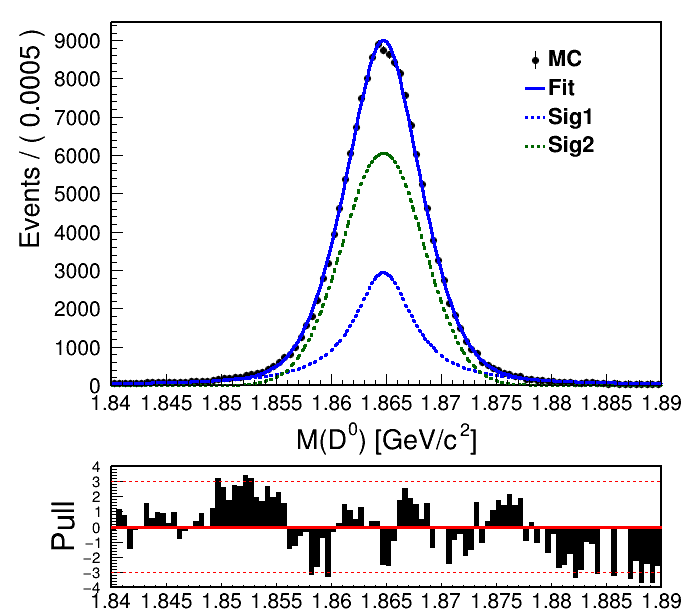

In [40]:
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0.001,0.05)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)
sigma4 = ROOT.RooRealVar("sigma4", "width of gaussians", 0.01,0.001,0.05)

# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


sig1 = ROOT.RooBreitWigner("sig1", "Signal component 1", x, mean, sigma1)

# sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma3,sigma4)


# sig2 = ROOT.RooBreitWigner("sig2", "Signal component 1", x, mean, sigma2)
# sig3 = ROOT.RooGaussian("sig3", "Signal component 1", x, mean, sigma3)

# RooBreitWigner (const char *name, const char *title, RooAbsReal &_x, RooAbsReal &_mean, RooAbsReal &_width)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)

# sig_model1 = ROOT.RooAddPdf("sig_model1", "Signal1", [sig1, sig2], sig1frac)
# sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig3, sig_model1], sig2frac)


sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




# c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = roodataset

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



# nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.8,0,N_total)
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.2,0, N_total)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

# r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

r = sig_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE, Range=fitting_region, Save=1)
# r = sig_model.fitTo(data,NumCPU=12, Range=(1.85,1.88))


r.Print("v")
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


# extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



# extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

# extended_model.plotOn(frame, Name="fitting")

sig_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)
sig_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)
# sig_model.plotOn(frame, Name="sig3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)

sig_model.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig1", "Sig1", "l")
leg1.AddEntry("sig2", "Sig2", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

In [41]:
r.Print("v")


  RooFitResult: minimized FCN value: -667647, estimated distance to minimum: 3.25309e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                  mean    1.8600e+00    1.8647e+00 +/-  2.33e-05  <none>
              sig1frac    5.0000e-01    3.2401e-01 +/-  6.16e-03  <none>
                sigma1    2.0000e-02    6.3782e-03 +/-  1.28e-04  <none>
                sigma3    1.0000e-02    3.7615e-03 +/-  2.85e-05  <none>
                sigma4    1.0000e-02    3.6842e-03 +/-  2.70e-05  <none>



# Fit D0 + D0 bar

In [42]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

loc_ccbar = base_file_loc + 'ccbar/recon_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/r = sig_model.fitTo(data,NumCPU=12, Range=fitting_region)
loc_uubar = base_file_loc + 'uubar/recon_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_*.root'
loc_charged = base_file_loc + 'charged/recon_*.root'
loc_mixed = base_file_loc + 'mixed/recon_*.root'
loc_taupair = base_file_loc + 'taupair/recon_*.root'

In [43]:
loc_ccbar_cc = base_file_loc + 'ccbar/recon_*.root/ref_phi_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_cc  = base_file_loc + 'uubar/recon_*.root/ref_phi_cc'
loc_ddbar_cc  = base_file_loc + 'ddbar/recon_*.root/ref_phi_cc'
loc_ssbar_cc  = base_file_loc + 'ssbar/recon_*.root/ref_phi_cc'
loc_charged_cc  = base_file_loc + 'charged/recon_*.root/ref_phi_cc'
loc_mixed_cc  = base_file_loc + 'mixed/recon_*.root/ref_phi_cc'
loc_taupair_cc  = base_file_loc + 'taupair/recon_*.root/ref_phi_cc'

In [44]:
# file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]
file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair,\
            loc_ccbar_cc,loc_uubar_cc,loc_uubar_cc,loc_ssbar_cc,loc_charged_cc,loc_mixed_cc,loc_taupair_cc]

mychain = ROOT.TChain("ref_phi")
# mychain = ROOT.TChain("ref_rho_cc")
 
for i in file_list:
    mychain.Add(i)

In [45]:
fitting_region = (1.83, 1.90)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
y = ROOT.RooRealVar("Dstarp_isSignal", "M(D^{0}) [GeV/c^{2}]", 0, 1, "")
# x.setBins(50)
# RooDataSet* data3 = new RooDataSet(“data3”,“data3”,sIeta,Import(*chain)) ;

# roodataset = ROOT.RooDataSet("roodataset","", x , ROOT.RooFit.Import(mychain), ROOT.RooFit.CutRange("D0_M>1.83 && D0_M<1.9"))
# roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain), Cut="Dstarp_isSignal==1 ")
roodataset_i = ROOT.RooDataSet("roodataset_i","", ROOT.RooArgSet(x, y) , ROOT.RooFit.Import(mychain))



roodataset = roodataset_i.reduce("D0_M>1.83 && D0_M<1.90 ")
roodataset.Print("v")

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #32 because D0_M cannot accommodate the value 1.82528
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #82 because D0_M cannot accommodate the value 1.90248
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #139 because D0_M cannot accommodate the value 1.81218
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping event #146 because D0_M cannot accommodate the value 1.80435
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(roodataset_i) Ignored 15068 out-of-range events
[#1] INFO:InputArguments -- The formula D0_M>1.83 && D0_M<1.90  claims to use the variables (D0_M,Dstarp_isSignal) but only (D0_M) seem to be in use.
  inputs:         D0_M>1.83 && D0_M<1.90 
DataStore roodataset_i ()
  Contains 343432 entries
  Observables:

In [46]:
N_total = roodataset.sumEntries()
print(N_total)

343432.0


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_roodataset_i) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2,bkg_x_model)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2,bkg_x_model)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig1,sig2,bkg_x_model)
[#1] INFO:Minimization --  The following expressi

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


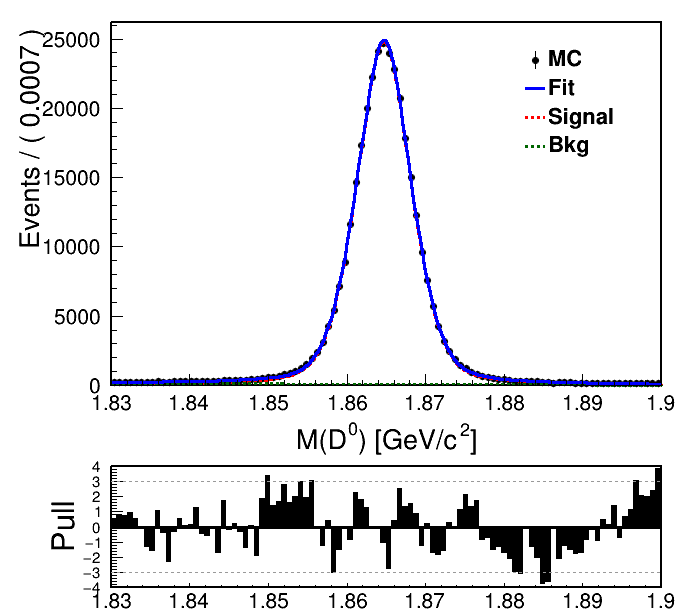

In [49]:
# x.setBins(70)

# mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86475,1.86475,1.86475)
# sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 7.03763e-03,7.03763e-03,7.03763e-03)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 3.64278e-03,3.64278e-03,3.64278e-03)
# sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 3.55871e-03,3.55871e-03,3.55871e-03)


# sig1 = ROOT.RooBreitWigner("sig1", "Signal component 1", x, mean,sigma1)
# sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean,sigma2, sigma3)
# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 3.22985e-01,3.22985e-01,3.22985e-01)

# # sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)



mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)
sigma4 = ROOT.RooRealVar("sigma4", "width of gaussians", 0.01,0.001,0.05)


sig1 = ROOT.RooBreitWigner("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma3,sigma4)
sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)






c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = roodataset

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.9,0,N_total)
nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.1,0, N_total)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region, Save=1, PrintLevel=-1)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig", "Signal", "l")
leg1.AddEntry("bkg", "Bkg", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kBlack)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kGray+1)
line2.SetLineColor(ROOT.kGray+1)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
# canv.SaveAs("/media/jykim/T7/saved_plots/references/ref_phi/FIT_ref_phi_MC15ri_1ab_DDbar_D0M.png")

In [51]:
print(mean)

RooRealVar::mean = 1.86475 +/- 0  L(1.86475 - 1.86475) 



In [48]:
print(nsig)
print(nbkg)

RooRealVar::nsig = 333616 +/- 602.563  L(0 - 343432) 

RooRealVar::nbkg = 9824.12 +/- 200.93  L(0 - 343432) 



In [52]:
# All floating
print(nsig)
print(nbkg)

RooRealVar::nsig = 334515 +/- 675.376  L(0 - 343432) 

RooRealVar::nbkg = 8917.87 +/- 360.928  L(0 - 343432) 



D0_M


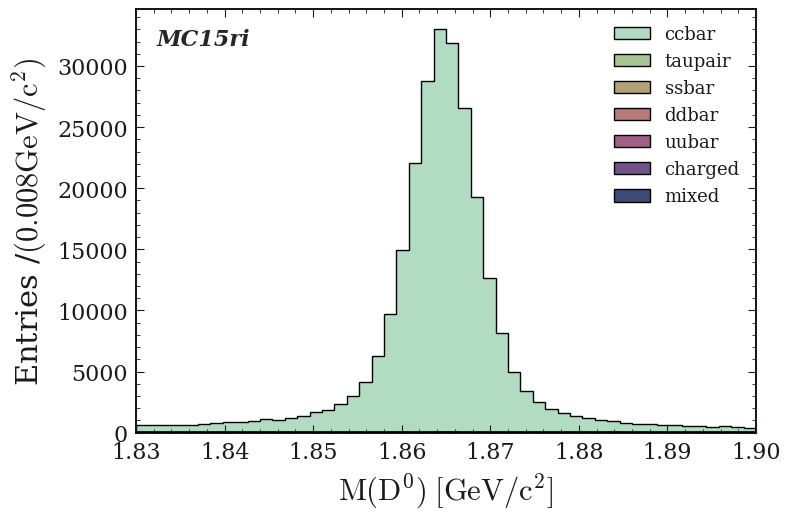

<Figure size 800x550 with 0 Axes>

In [5]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.83,1.90)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


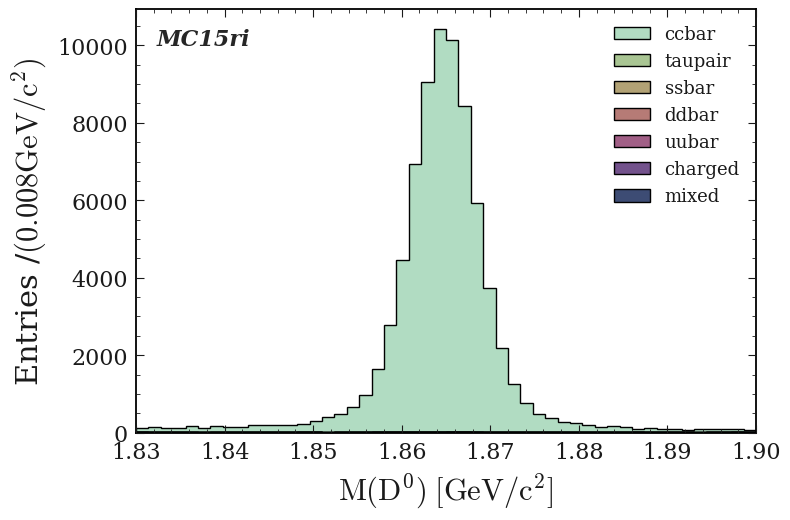

<Figure size 800x550 with 0 Axes>

In [22]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.83,1.90)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

__ncandidates__


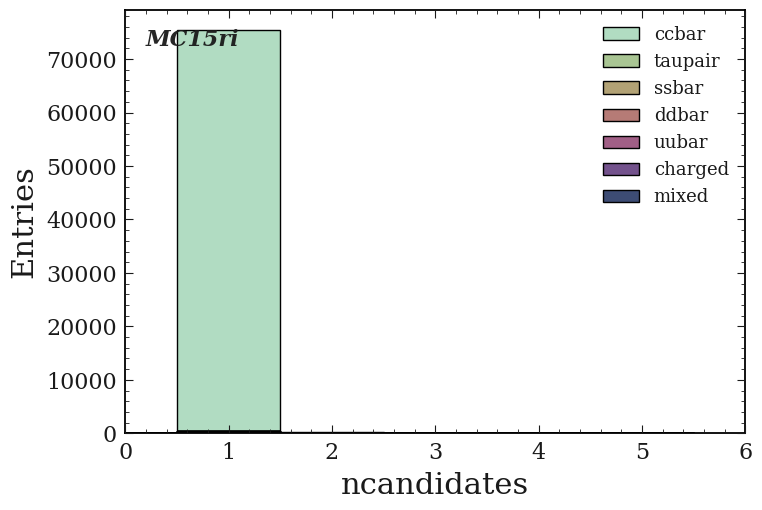

<Figure size 800x550 with 0 Axes>

In [23]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["__ncandidates__"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,6)
    xbins = np.linspace(*xrange,7)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black',align="left")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=5, range=(1,6))

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("ncandidates")
    width = xe[1]-xe[0]
    plt.ylabel('Entries');
    plt.show()
    plt.clf()

In [6]:
# pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
# pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)


pd_all_generic = pd.concat([pd_ccbar_0, pd_uubar_0, pd_ddbar_0, pd_ssbar_0, pd_charged_0, pd_mixed_0, pd_taupair_0], ignore_index=True)

pd_all_generic.describe()

,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal
count,263483.000000,263483.000000,263483.000000,263483.000000,260009.000000
mean,1.864497,0.005875,3.426148,1.002471,0.946290
std,0.008345,0.000222,0.605875,0.049645,0.225444
min,1.830002,0.005330,2.450007,1.000000,0.000000
25%,1.861490,0.005741,2.918023,1.000000,1.000000
50%,1.864659,0.005864,3.370716,1.000000,1.000000
75%,1.867765,0.005994,3.885420,1.000000,1.000000
max,1.899999,0.006530,5.019806,2.000000,1.000000


In [7]:
N_isSignal_1 = len(pd_all_generic.query('Dstarp_isSignal==1'))
print(N_isSignal_1)

246044


In [8]:
np_data = pd_all_generic['D0_M'].to_numpy()

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.83,1.9]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.83,1.9]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_extended_model_' created with bounds [1.83,1.9]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMo

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file test.png has been created


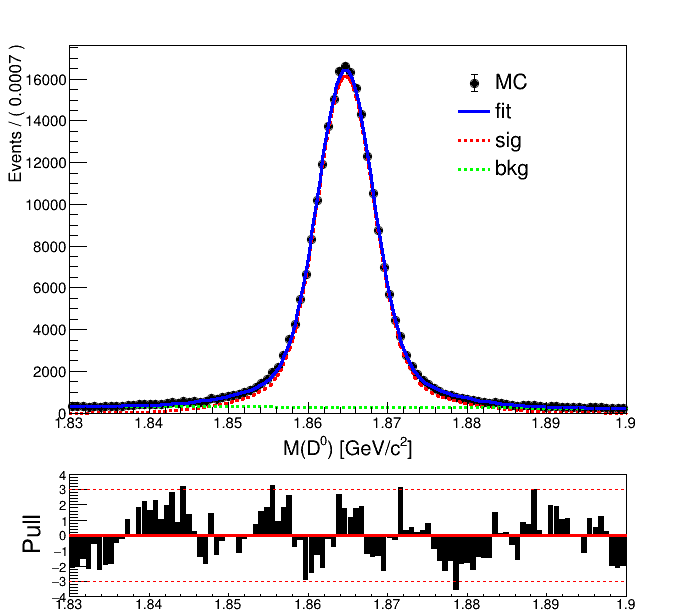

In [9]:
fitting_region = (1.83, 1.90)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.88)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.03,0.001,0.05)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)





data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))


r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")

leg1 = ROOT.TLegend(0.65, 0.6, 0.9, 0.85)
# leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(0)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
# leg1.AddEntry("sig1", "sig1", "l")
# leg1.AddEntry("sig2", "sig1", "l")

leg1.AddEntry("sig", "sig", "l")
leg1.AddEntry("bkg", "bkg", "l")
leg1.SetTextSize(0.05)
leg1.SetBorderSize(0)

leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

In [10]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 235645 +/- 619.327  L(0 - 263483) 

RooRealVar::nbkg = 27840.8 +/- 419.264  L(0 - 263483) 



In [27]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 70080.9 +/- 292.645  L(0 - 75747) 

RooRealVar::nbkg = 5667.61 +/- 146.239  L(0 - 75747) 

